# COMP30850- Assignment 1
<b>By Brian Byrne - 18391933</b>
The goal of this assignment is to construct and characterise network representations
of two movie-related datasets. The datasets were identically structured JSON files containing data on different actors.The datasets were retrieved from a perosnalised zip file from <i>http://mlg.ucd.ie/modules/COMP30850/datasets/18391933.zip</i>. For the purpose of this study i have split the assignment into 4 sections:
* <b>Network Construction</b>- Using the datasets to create a structured, weighted co-starring network of actors.
* <b>Network Characterisation</b>- Using connectivity, visual and centrality measurement techniques to understand the layout and dimensions of the network.
* <b>Ego-centric analysis</b>- Designing a subnetwork of the two larger networks out of important nodes for more percise and indepth analytics.
* <b>Network Visualisation</b>- Using Gephi software tools to create more detailled networks graphs than would be possible using Jupyter Networks on it's own. 



In [5]:
# Importing of relevant packagages 
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
%matplotlib inline

## 1. Network construction

### Loading the Data
For this exercise we will parse the JSON data into pandas dataframes, for cleaning and filtering.


In [9]:
#Loading in of Datasets
load_set1=open("18391933-dataset1.json",)
set1_data=json.load(load_set1)
load_set1.close()

load_set2=open("18391933-dataset2.json",)
set2_data=json.load(load_set2)
load_set2.close()

<b>set1_df</b> and <b>set2_df</b> represent the two datasets from the zip file respectively.

In [10]:
#Adding the JSON datasets to pandas dataframes
set1_df=pd.DataFrame(set1_data)
set2_df=pd.DataFrame(set2_data)

set1_df.head()

,id,name,born,movies
0,000128,Russell Crowe,1964-04-07,"[{'id': '10059518', 'title': 'Unhinged', 'year..."
1,0206257,Rosario Dawson,1979-05-09,"[{'id': '13787320', 'title': 'Rocky Horror Sho..."
2,000905,Roberto Benigni,1952-10-27,"[{'id': '8333746', 'title': 'Pinocchio', 'year..."
3,0001833,Emily Watson,1967-01-14,"[{'id': '10482370', 'title': 'The Third Day', ..."
4,5052065,Ansel Elgort,1994-03-14,"[{'id': '3864056', 'title': 'The Goldfinch', '..."


In [11]:
set2_df.head()

,id,name,born,movies
0,0000538,Colm Meaney,1953-05-30,"[{'id': '13356010', 'title': 'The Monkey', 'ye..."
1,0914455,Leonor Watling,1975-07-28,"[{'id': '10039610', 'title': 'Mi hermano Juan'..."
2,0000932,Halle Berry,1966-08-14,"[{'id': '8310474', 'title': 'Bruised', 'year':..."
3,0000138,Leonardo DiCaprio,1974-11-11,"[{'id': '8690814', 'title': 'Grant', 'year': 2..."
4,0591485,Liza Minnelli,1946-03-12,"[{'id': '10908058', 'title': 'The King of Come..."


Our pandas dataframes clearly tell show the name, id, date of bith and an intricate list of details regarding each of the films we that they have starred in.

### Data cleaning
After observing the data, we can remove unnecessary columns, as part of our data preprocessing. Moreover, we will construct dictionarys for each set where the key is each of the actors present and the values assigned to that key is a list of the "film id"s that the actors starred in. I chose to use film ID's as opposed to the films names as it is not uncommon for two or more films to have the exact same name. I.E. if I were to use the film name "Gulliver's Travels", then actors who starred in the 1977 film would be connected to actors who starred in the 2010 remake of the same name, which would be inaccurate. 

In [12]:
#Function to remove unnecessary columns from the datasets
def clean(df):
    del df["id"]
    del df["born"]
    
    
clean(set1_df)
clean(set2_df)

In [13]:
set1_df.head()

,name,movies
0,Russell Crowe,"[{'id': '10059518', 'title': 'Unhinged', 'year..."
1,Rosario Dawson,"[{'id': '13787320', 'title': 'Rocky Horror Sho..."
2,Roberto Benigni,"[{'id': '8333746', 'title': 'Pinocchio', 'year..."
3,Emily Watson,"[{'id': '10482370', 'title': 'The Third Day', ..."
4,Ansel Elgort,"[{'id': '3864056', 'title': 'The Goldfinch', '..."


In [14]:
#Listing the actors by name to use as keys in future dictionarys and nodes
actors1=set1_df["name"]
actors2=set2_df["name"]


In [15]:
#this dictionary will return all the films of a specific actor when you use their name as the key
# in the dictionary
by_actor1={}
i=0
for actor in actors1:
    films=[]                  #The list of films for a given actor
    star=set1_df["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=set1_df["movies"][i][j]["id"]
        films.append(temp)
    
    by_actor1[actor]=films     #Filling in our dictionary
    i=i+1
    
 #######################################################################################   
## Repeating the process for the second dataset
by_actor2={}
i=0
for actor in actors2:
    films=[]
    star=set2_df["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=set2_df["movies"][i][j]["id"]
        films.append(temp)
    
    by_actor2[actor]=films
    i=i+1
    


### Construction of Networks
Now that we have dictionarys listing the film credit ids to each actor, we can constuct our network. Here I used the networkX library tools to build my graph. I wrote the following algorithm that identifies if two actors have any mutual film credits using nested for loops. The .intersection function returns and integer of the number of mutual film credits each actor has.This is equal to the weight of the edge between the two nodes. If there is one or more intersections, then two nodes and a weighted edge will be constructed within the graph. Another benefit of building by edges rather than by node, is that any <b>isolated nodes</b> (nodes that have no neighbours but exist in the networks) will not be included in the graph.

In [16]:
g1=nx.Graph()

## Use loops and the intersection function to find those that intersect

    
for i in range (len(actors1)-1):     #Comparing the films of actors to find costars
    list1=by_actor1[actors1[i]]
    for j in range(i+1,len(actors1)):
        list1_asSet=set(list1)
        list2=by_actor1[actors1[j]]
        intersection=list(list1_asSet.intersection(list2))  #list of mutually starred films by the two actors
        
        if intersection:
            g1.add_edge(actors1[i],actors1[j], weight=len(intersection))    
           #edges of actors who co-star in more films will be weighted by the number of mutual films they have   
##########################################################################################
#I have chosen this algorithm to populate my graph, as it assembles weighted edges and ignores
# isolated nodes that are independent of the other nodes (i.e has not co-starred with any actors in the dataset)
##########################################################################################
## Repeating the process for the second dataset
g2=nx.Graph()

    
for i in range (len(actors2)-1):
    list1=by_actor2[actors2[i]]
    for j in range(i+1,len(actors2)):
        list1_asSet=set(list1)
        list2=by_actor2[actors2[j]]
        intersection=list(list1_asSet.intersection(list2))
        
        if intersection:
            g2.add_edge(actors2[i],actors2[j], weight=len(intersection))
            

Now that we have created the two graphs from the networks, we can use the following functions to make sure graphs of the two networks have been successfully implemented

In [838]:
# Functions for displaying data and graphs of our networks
# Function to print edges 
def showEdges(graph):
    for edge in graph.edges(data=True):
        print(edge)

# Function to print nodes 
def showNodes(graph):
    for node in graph.nodes(data=True):
        print(node)
        
#function to draw our existing graph
def drawGraph(graph):
    plt.figure(figsize=(20,20))
    nx.draw_networkx(graph, with_labels=True, node_size=700, node_color="cyan" )
    plt.axis("off")
    plt.show()
# Function
def networkSizes(graph):
    print("Number of nodes:",graph.number_of_nodes())
    print("Number of edges:",graph.number_of_edges())

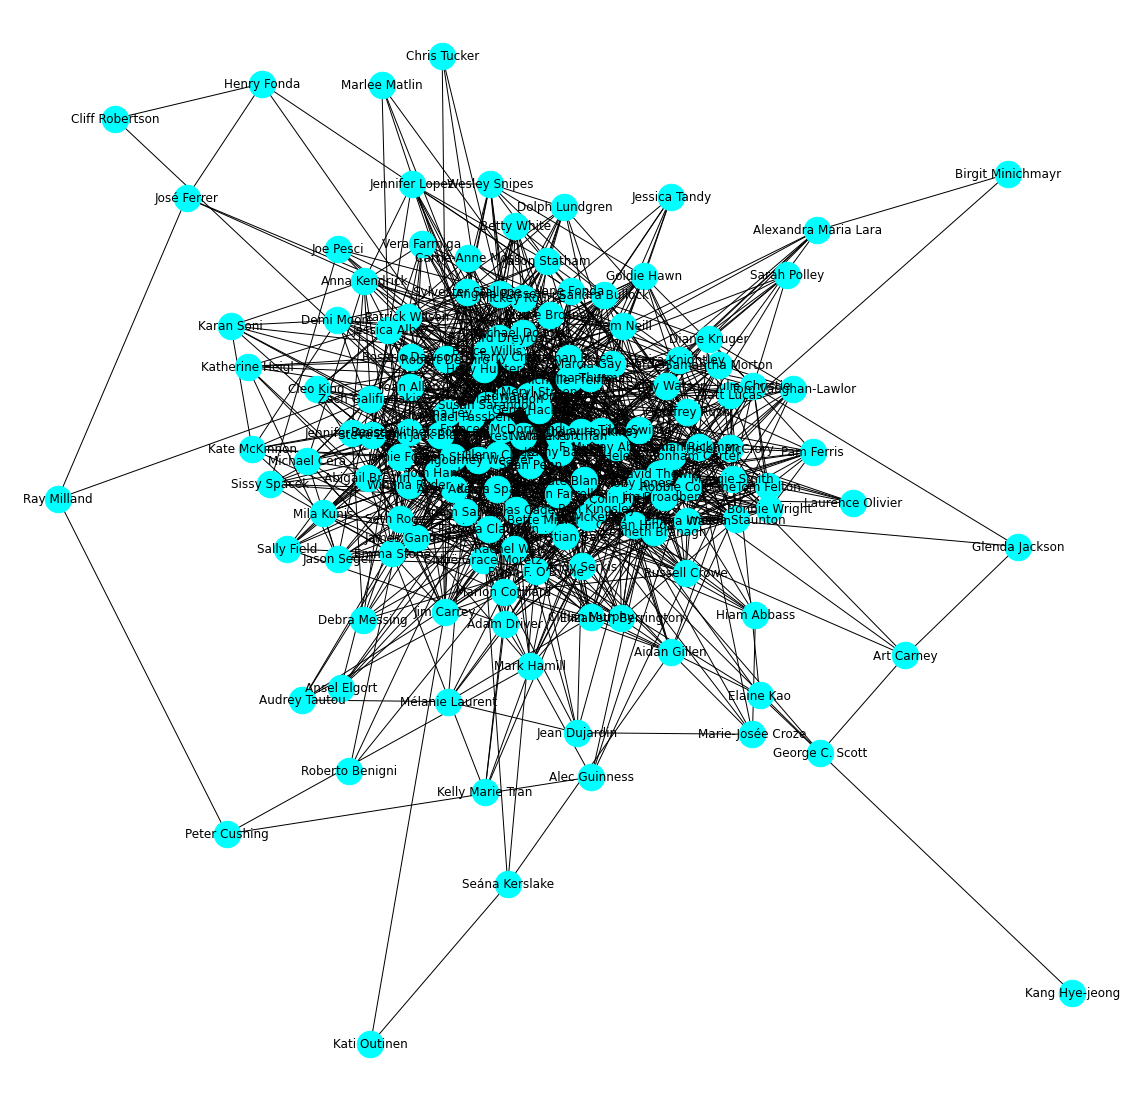

Number of nodes: 148
Number of edges: 1425


In [839]:
drawGraph(g1)
networkSizes(g1)

In [840]:
showEdges(g1)

('Russell Crowe', 'Diane Kruger', {'weight': 1})
('Russell Crowe', 'Christian Bale', {'weight': 1})
('Russell Crowe', 'Helena Bonham Carter', {'weight': 1})
('Russell Crowe', 'Gene Hackman', {'weight': 1})
('Russell Crowe', 'Jane Fonda', {'weight': 1})
('Russell Crowe', 'Cate Blanchett', {'weight': 1})
('Russell Crowe', 'Colin Farrell', {'weight': 1})
('Russell Crowe', 'Ben Kingsley', {'weight': 1})
('Russell Crowe', 'Jim Broadbent', {'weight': 1})
('Russell Crowe', 'Marion Cotillard', {'weight': 1})
('Russell Crowe', 'Amy Adams', {'weight': 1})
('Russell Crowe', 'Kevin Spacey', {'weight': 1})
('Russell Crowe', 'Tilda Swinton', {'weight': 1})
('Russell Crowe', 'Anthony Hopkins', {'weight': 2})
('Russell Crowe', 'Emma Watson', {'weight': 1})
('Diane Kruger', 'Mélanie Laurent', {'weight': 1})
('Diane Kruger', 'Michael Fassbender', {'weight': 1})
('Diane Kruger', 'Sarah Polley', {'weight': 1})
('Diane Kruger', 'Jane Fonda', {'weight': 1})
('Diane Kruger', 'Alexandra Maria Lara', {'weight'

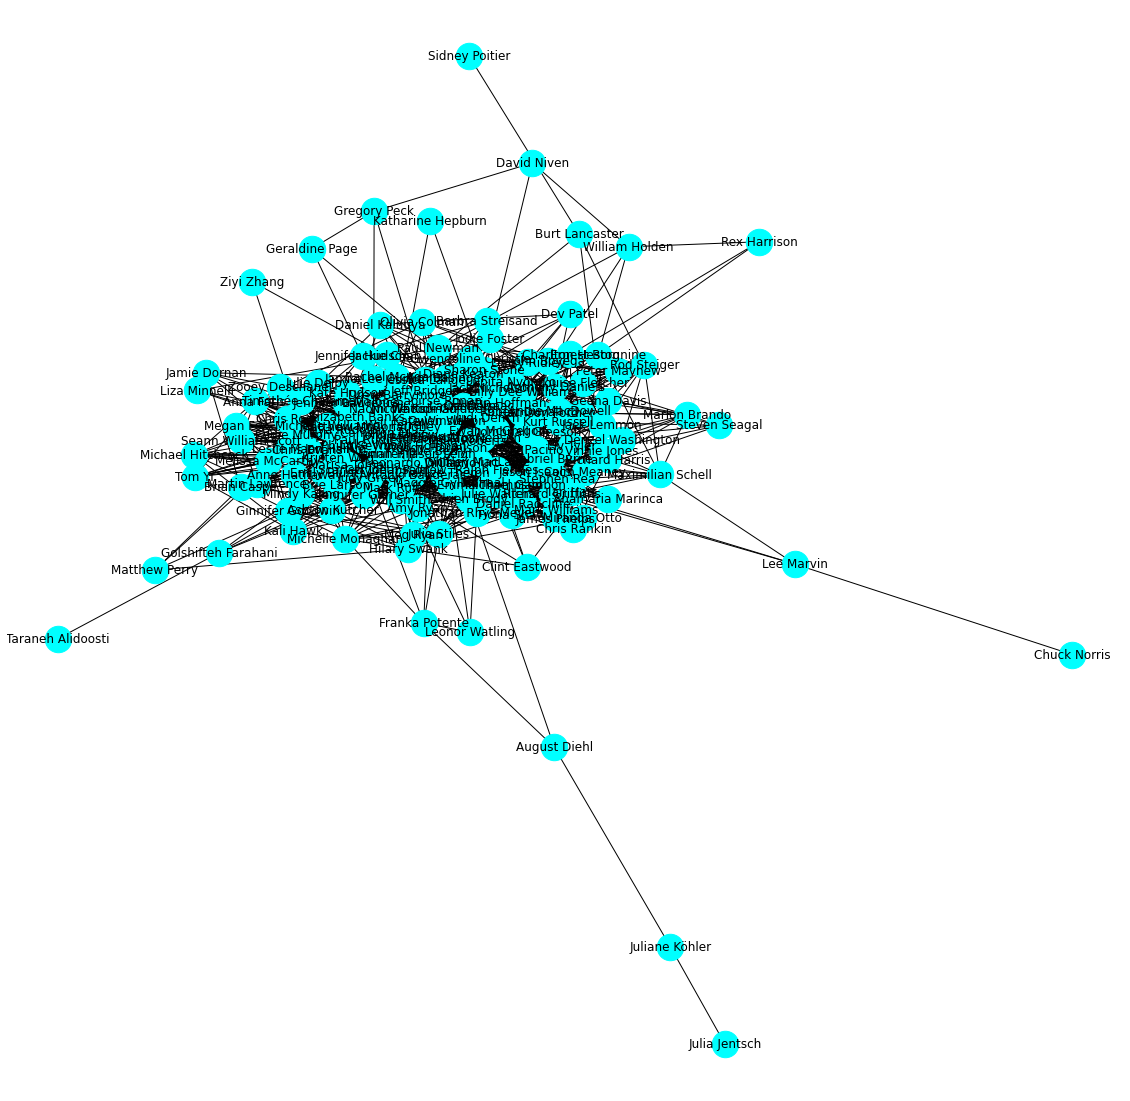

Number of nodes: 160
Number of edges: 1559


In [841]:
drawGraph(g2)
networkSizes(g2)

In [842]:
showEdges(g2)

('Colm Meaney', 'Jason Isaacs', {'weight': 1})
('Colm Meaney', 'Al Pacino', {'weight': 1})
('Colm Meaney', 'Dustin Hoffman', {'weight': 1})
('Colm Meaney', 'Julie Walters', {'weight': 1})
('Colm Meaney', 'Michael Gambon', {'weight': 1})
('Colm Meaney', 'Kali Hawk', {'weight': 1})
('Colm Meaney', 'Owen Wilson', {'weight': 1})
('Colm Meaney', 'Jonah Hill', {'weight': 1})
('Colm Meaney', 'Gabriel Byrne', {'weight': 2})
('Colm Meaney', 'Ian Hart', {'weight': 3})
('Colm Meaney', 'Nicole Kidman', {'weight': 1})
('Colm Meaney', 'Ernest Borgnine', {'weight': 1})
('Colm Meaney', 'Woody Harrelson', {'weight': 1})
('Colm Meaney', 'Steven Seagal', {'weight': 1})
('Colm Meaney', 'Whoopi Goldberg', {'weight': 1})
('Colm Meaney', 'Stephen Rea', {'weight': 2})
('Jason Isaacs', 'Richard Griffiths', {'weight': 3})
('Jason Isaacs', 'Julie Walters', {'weight': 5})
('Jason Isaacs', 'Michael Gambon', {'weight': 5})
('Jason Isaacs', 'Jackie Chan', {'weight': 1})
('Jason Isaacs', 'Richard Harris', {'weight': 

### Summary
As you can see from the following visualizations and data, both the graphs do not contain any isolated nodes and are similarly sized, with graph 2 being slightly larger in size than graph 1. We can also see that our edges are weighted correctly.

## 2. Network characterisation
###  Characterisation Statisitics

In [843]:
##Charachterising functions##
def components(graph):  #this function tells us how many divided graphs make up the network
    if nx.is_connected(graph):
        print("The whole network is one component, made up of",nx.number_connected_components(graph),"connected component")
    else:
        print("The network is made up of: ",nx.number_connected_components(graph),"connected components")
        
def networkDensity(graph,name): #Density is calculated numerically as the ratio of existing edges over the total number of potential edges between all pairs of nodes.
    n=graph.number_of_nodes()
    potential_edges=(n*(n-1))/2
    density=graph.number_of_edges()/potential_edges
    print(name,"has a network density of",round(density*100,2),"%")
    
def networkDiameter(graph): #he longest shortest path in the entire network
    return nx.diameter(graph)

def meanCluster(graph,name):
    print("The nodes in",name,"have and average clustering coefficient of",round(nx.average_clustering(graph),2))
    

In [844]:
components(g1)

The whole network is one component, made up of 1 connected component


In [845]:
components(g2)

The whole network is one component, made up of 1 connected component


In [846]:
networkDensity(g1,"g1")

g1 has a network density of 13.1 %


In [847]:
networkDensity(g2,"g2")

g2 has a network density of 12.26 %


In [848]:
print("g1 has a network diameter of",networkDiameter(g1))

g1 has a network diameter of 5


In [849]:
print("g2 has a network diameter of",networkDiameter(g2))

g2 has a network diameter of 7


In [850]:
meanCluster(g1,"g1")

The nodes in g1 have and average clustering coefficient of 0.29


In [851]:
meanCluster(g2,"g2")

The nodes in g2 have and average clustering coefficient of 0.29


In [852]:
#Weight distribution#
def createDF(graph):
    weights = {}
    for node1, node2, data in graph.edges(data=True):
        weights[(node1,node2)] = data["weight"]  
    return pd.Series(weights)

In [853]:
#histogram
def histogram(df,heading):
    ax = df.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="darkcyan")
    ax.set_title(heading,fontsize=30, color="k")
    ax.set_ylabel("Number of Edges", fontsize=14)
    ax.set_xlabel("Weight", fontsize=14);
    

In [854]:
g1_weights=createDF(g1)
g1_weights

Russell Crowe  Diane Kruger            1
               Christian Bale          1
               Helena Bonham Carter    1
               Gene Hackman            1
               Jane Fonda              1
                                      ..
José Ferrer    Ray Milland             1
Matt Lucas     Elaine Kao              1
Elaine Kao     Kang Hye-jeong          1
Alec Guinness  Peter Cushing           1
Ray Milland    Peter Cushing           1
Length: 1425, dtype: int64

In [855]:
g2_weights=createDF(g2)
g2_weights

Colm Meaney       Jason Isaacs        1
                  Al Pacino           1
                  Dustin Hoffman      1
                  Julie Walters       1
                  Michael Gambon      1
                                     ..
Megan Fox         Will Smith          1
                  Melissa McCarthy    1
Melissa McCarthy  Matthew Perry       1
August Diehl      Juliane Köhler      1
Juliane Köhler    Julia Jentsch       2
Length: 1559, dtype: int64

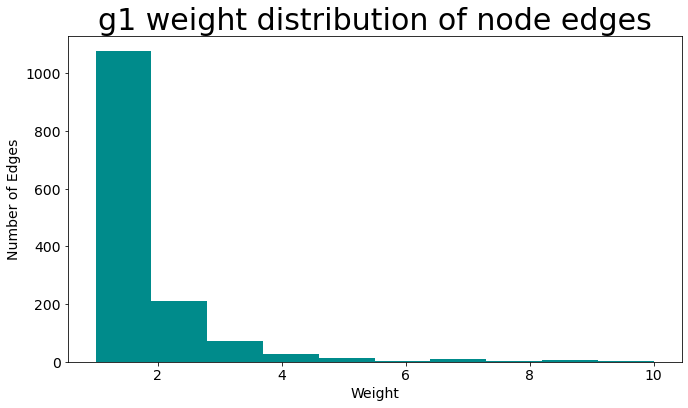

In [856]:
histogram(g1_weights, "g1 weight distribution of node edges")

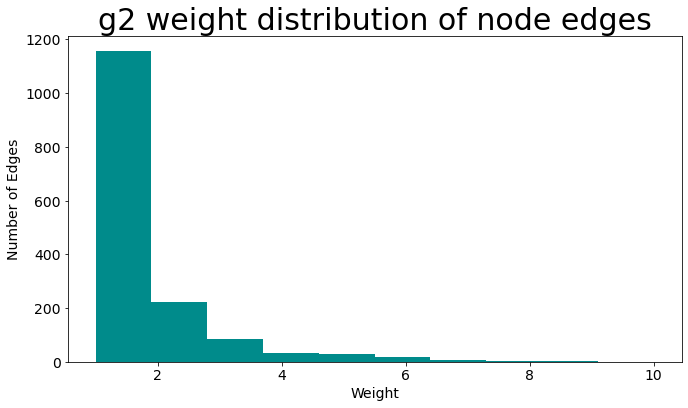

In [857]:
histogram(g2_weights,"g2 weight distribution of node edges")

In [858]:
g1_10_weights=g1_weights.sort_values(ascending=False).head( 10 )
g1_10_weights

Jack Black     Seth Rogen         10
Emma Watson    Robbie Coltrane    10
Jack Black     Ben Stiller         9
Emma Watson    Tom Felton          9
Tom Felton     Robbie Coltrane     9
Alan Rickman   Robbie Coltrane     9
Bonnie Wright  Robbie Coltrane     9
Tom Felton     Bonnie Wright       9
Emma Watson    Bonnie Wright       9
               Alan Rickman        8
dtype: int64

In [859]:
g2_10_weights=g2_weights.sort_values(ascending=False).head( 10 )
g2_10_weights

Cameron Diaz        Eddie Murphy        10
Daniel Radcliffe    James Phelps         9
Scarlett Johansson  Chris Evans          9
Anthony Daniels     Peter Mayhew         9
Julie Walters       Michael Gambon       8
Harrison Ford       Anthony Daniels      8
Jonah Hill          Kristen Wiig         8
Michael Gambon      Mark Williams        7
Julie Walters       Daniel Radcliffe     7
Mark Williams       Daniel Radcliffe     7
dtype: int64

In [860]:
g2_10_weights["Daniel Radcliffe"]

James Phelps    9
dtype: int64

In [861]:
#Node Degrees- function that creates a dataframe of each node and the degrees
def degrees_df(graph):
    degrees = dict( graph.degree() )
    return pd.Series(degrees)

def degreeData(df):
    print('Degree range: [%d, %d]' % (df.min(), df.max() ) )
    print('Mean degree: %.2f' % df.mean() )
    print('Median degree: %d' % df.median() )

def deghistogram(df,heading):
    ax = df.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="darkorange")
    ax.set_title(heading,fontsize=30, color="k")
    ax.set_ylabel("Number of nodes", fontsize=14)
    ax.set_xlabel("Degree", fontsize=14);
    
def centralityData(graph):
    deg = nx.degree_centrality(graph)
    bet = nx.betweenness_centrality(graph, weight="weight")
    eig = nx.eigenvector_centrality(graph, weight="weight")
    close = nx.closeness_centrality(graph)
    s = pd.Series(deg)
    df = pd.DataFrame(s,columns=["degree_centrality"])
    df["weighted betweenness"] = pd.Series(bet)
    df["closeness"] = pd.Series(close)
    df["weighted eigenvector"] = pd.Series(eig)
    return df.sort_values(by="degree_centrality",ascending=False)


In [862]:
degreesg1=degrees_df(g1)
degreesg2=degrees_df(g2)

print(" ________\n|g1 stats|\n|________|")
degreeData(degreesg1)
print(" ________\n|g2 stats|\n|________|")
degreeData(degreesg2)

 ________
|g1 stats|
|________|
Degree range: [1, 55]
Mean degree: 19.26
Median degree: 19
 ________
|g2 stats|
|________|
Degree range: [1, 55]
Mean degree: 19.49
Median degree: 18


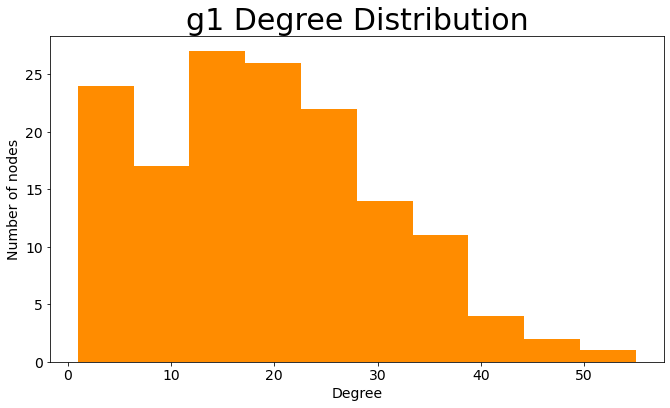

In [863]:
deghistogram(degreesg1, "g1 Degree Distribution")

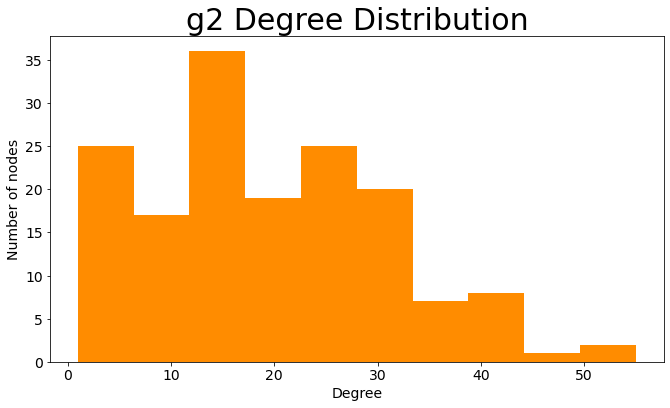

In [864]:
deghistogram(degreesg2, "g2 Degree Distribution")

In [865]:
g1measures=centralityData(g1)
g1measures.head(10)

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Susan Sarandon,0.374150,0.048997,0.602459,0.050505
Bruce Willis,0.319728,0.036189,0.588000,0.039087
Meryl Streep,0.306122,0.018517,0.571984,0.048326
Edward Norton,0.292517,0.032631,0.565385,0.032816
Robert De Niro,0.285714,0.026997,0.561069,0.037030
Anthony Hopkins,0.278912,0.019351,0.561069,0.045871
David Thewlis,0.272109,0.013728,0.556818,0.257465
Ciarán Hinds,0.258503,0.019528,0.548507,0.108681
Jim Broadbent,0.251701,0.006017,0.554717,0.199124
Sigourney Weaver,0.244898,0.040316,0.556818,0.044349


In [866]:
g1measures.corr()

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
degree_centrality,1.000000,0.809563,0.934555,0.373150
weighted betweenness,0.809563,1.000000,0.711475,0.115504
closeness,0.934555,0.711475,1.000000,0.317151
weighted eigenvector,0.373150,0.115504,0.317151,1.000000


We can see that weighted eigenvector is the lowest correlating 

In [867]:
g1ms=g1measures.sort_values(by="weighted eigenvector",ascending=False).head(10)
g1ms

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Robbie Coltrane,0.217687,0.004912,0.536496,0.355881
Alan Rickman,0.217687,0.023075,0.542435,0.344466
Emma Watson,0.163265,0.004297,0.508651,0.335090
Tom Felton,0.122449,0.002220,0.469649,0.325524
Bonnie Wright,0.102041,0.000031,0.455108,0.318367
Maggie Smith,0.210884,0.015037,0.525000,0.294546
David Thewlis,0.272109,0.013728,0.556818,0.257465
Helena Bonham Carter,0.238095,0.007069,0.542435,0.239587
Imelda Staunton,0.156463,0.001253,0.503425,0.216268
Jim Broadbent,0.251701,0.006017,0.554717,0.199124


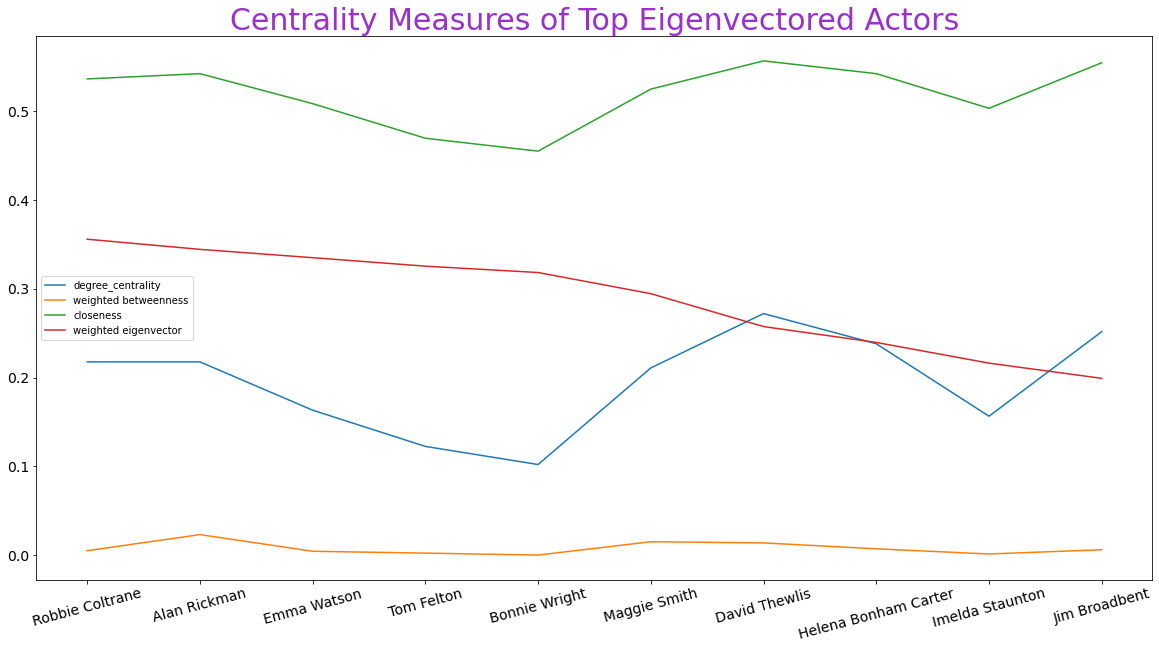

In [868]:
plt.figure(figsize=(20,10))
plt.plot(g1ms)
plt.title("Centrality Measures of Top Eigenvectored Actors", fontsize=30, color="darkorchid")
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=14)
plt.gca().legend(("degree_centrality","weighted betweenness","closeness","weighted eigenvector"))
plt.show()


In [869]:
degreesg1.sort_values(ascending=False).head(10)

Susan Sarandon      55
Bruce Willis        47
Meryl Streep        45
Edward Norton       43
Robert De Niro      42
Anthony Hopkins     41
David Thewlis       40
Ciarán Hinds        38
Jim Broadbent       37
Sigourney Weaver    36
dtype: int64

In [870]:
g1_10_weights

Jack Black     Seth Rogen         10
Emma Watson    Robbie Coltrane    10
Jack Black     Ben Stiller         9
Emma Watson    Tom Felton          9
Tom Felton     Robbie Coltrane     9
Alan Rickman   Robbie Coltrane     9
Bonnie Wright  Robbie Coltrane     9
Tom Felton     Bonnie Wright       9
Emma Watson    Bonnie Wright       9
               Alan Rickman        8
dtype: int64

In [871]:
g2measures=centralityData(g2)
g2measures.head(10)

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Julianne Moore,0.345912,0.037814,0.565836,0.069118
Liam Neeson,0.314465,0.033123,0.561837,0.088089
Paul Rudd,0.295597,0.020690,0.554007,0.063347
John Lithgow,0.264151,0.031593,0.542662,0.038453
Woody Harrelson,0.257862,0.014129,0.538983,0.060458
Julia Roberts,0.257862,0.025543,0.540816,0.040347
Kirsten Dunst,0.251572,0.031874,0.548276,0.042155
Penélope Cruz,0.251572,0.035592,0.544521,0.048110
Ralph Fiennes,0.251572,0.010459,0.544521,0.251351
Will Ferrell,0.245283,0.009627,0.535354,0.072691


In [872]:
g2measures.corr()

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
degree_centrality,1.000000,0.674368,0.874649,0.347646
weighted betweenness,0.674368,1.000000,0.527439,0.020088
closeness,0.874649,0.527439,1.000000,0.294091
weighted eigenvector,0.347646,0.020088,0.294091,1.000000


In [873]:
g2ms=g2measures.sort_values(by="weighted eigenvector",ascending=False).head(10)
g2ms

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Michael Gambon,0.226415,0.009900,0.531773,0.324241
Daniel Radcliffe,0.125786,0.000317,0.478916,0.319250
James Phelps,0.081761,0.000000,0.434426,0.316472
Julie Walters,0.150943,0.002812,0.492260,0.316239
Mark Williams,0.106918,0.000470,0.464912,0.299641
Jason Isaacs,0.194969,0.011438,0.511254,0.265573
Ralph Fiennes,0.251572,0.010459,0.544521,0.251351
Richard Griffiths,0.144654,0.005734,0.486239,0.247067
Fiona Shaw,0.157233,0.003901,0.496875,0.238173
Chris Rankin,0.081761,0.000048,0.434426,0.214388


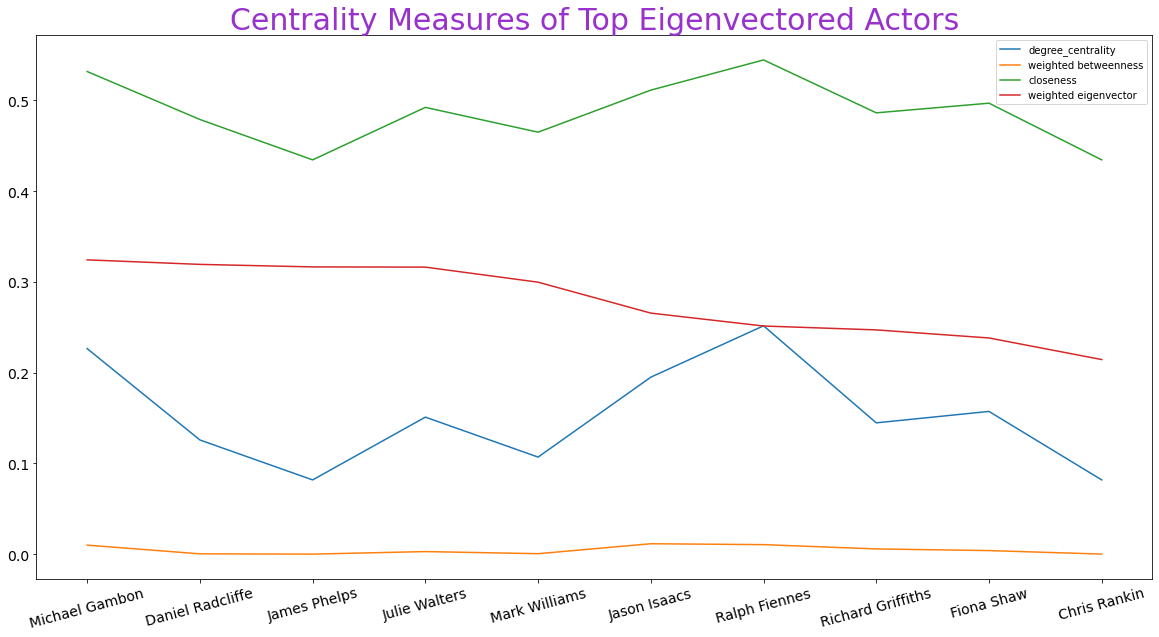

In [874]:
plt.figure(figsize=(20,10))
plt.plot(g2ms)
plt.title("Centrality Measures of Top Eigenvectored Actors", fontsize=30, color="darkorchid")
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=14)
plt.gca().legend(("degree_centrality","weighted betweenness","closeness","weighted eigenvector"))
plt.show()

In [875]:
degreesg2.sort_values(ascending=False).head(10)

Julianne Moore         55
Liam Neeson            50
Paul Rudd              47
John Lithgow           42
Julia Roberts          41
Woody Harrelson        41
Ralph Fiennes          40
Kirsten Dunst          40
Penélope Cruz          40
Matthew McConaughey    39
dtype: int64

In [876]:
g2_10_weights

Cameron Diaz        Eddie Murphy        10
Daniel Radcliffe    James Phelps         9
Scarlett Johansson  Chris Evans          9
Anthony Daniels     Peter Mayhew         9
Julie Walters       Michael Gambon       8
Harrison Ford       Anthony Daniels      8
Jonah Hill          Kristen Wiig         8
Michael Gambon      Mark Williams        7
Julie Walters       Daniel Radcliffe     7
Mark Williams       Daniel Radcliffe     7
dtype: int64

# 3. Ego-centric analysis

In [877]:
g1_ego_node="Robbie Coltrane"
g2_ego_node="Michael Gambon"

In [878]:
eg1 = nx.ego_graph(g1, g1_ego_node)
eg2 = nx.ego_graph(g2, g2_ego_node)

In [879]:
##Egocentric graphs statistics##
def egoStats(eg):
    networkSizes(eg)
    showNodes(eg)

def display_ego(g, ego_node):
    # build the ego network
    eg = nx.ego_graph(g, ego_node)
    # create the figure
    plt.figure(figsize=(20,25))
    plt.margins(0.1, 0.1)
    title = "Ego network for %s (%d nodes)" % (ego_node, eg.number_of_nodes())
    plt.title(title, fontsize=14)
    # lay out all nodes
    pos = nx.spring_layout(g)
    # draw the full network
    nx.draw_networkx(eg, pos, with_labels=True, font_size=12, node_size=900, node_color="paleturquoise", font_color="red",edge_color="gold")
    # draw the ego in red, with larger node size
    nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], node_size=2500, node_color="darkorange")
    plt.axis("off")
    
def barChart(df, header):
    p = df.plot.bar(figsize=(19, 10), fontsize=14)
    p.set_title(header, fontsize=35, color="k")
    plt.xticks(rotation=45, fontsize=14)
    #p.set_xlabel('% change from baseline', fontsize=24,color="blue")
    p.set_ylabel("Number of Neigbouring Nodes", fontsize=24,color="k")



In [880]:
print(" _________\n|eg1 stats|\n|_________|")
egoStats(eg1)
print(" _________\n|eg2 stats|\n|_________|")
egoStats(eg2)

 _________
|eg1 stats|
|_________|
Number of nodes: 33
Number of edges: 223
('Robbie Coltrane', {})
('Emma Watson', {})
('Colin Firth', {})
('Mickey Rourke', {})
('Rachel Weisz', {})
('Tilda Swinton', {})
('Mark Hamill', {})
('Kenneth Branagh', {})
('Jim Broadbent', {})
('Julie Christie', {})
('Pam Ferris', {})
('Helen McCrory', {})
('Christian Bale', {})
('Toby Jones', {})
('Laura Linney', {})
('Richard Dreyfuss', {})
('Bonnie Wright', {})
('Imelda Staunton', {})
('Andy Serkis', {})
('David Thewlis', {})
('Pierce Brosnan', {})
('Alan Rickman', {})
('Bruce Willis', {})
('Ciarán Hinds', {})
('Maggie Smith', {})
('F. Murray Abraham', {})
('Sigourney Weaver', {})
('Uma Thurman', {})
('Matt Damon', {})
('Tom Felton', {})
('Ian McKellen', {})
('Ben Kingsley', {})
('Helena Bonham Carter', {})
 _________
|eg2 stats|
|_________|
Number of nodes: 37
Number of edges: 212
('Fiona Shaw', {})
('William Hurt', {})
('Brian Caspe', {})
('Julianne Moore', {})
('Jason Isaacs', {})
('Julie Walters', {})


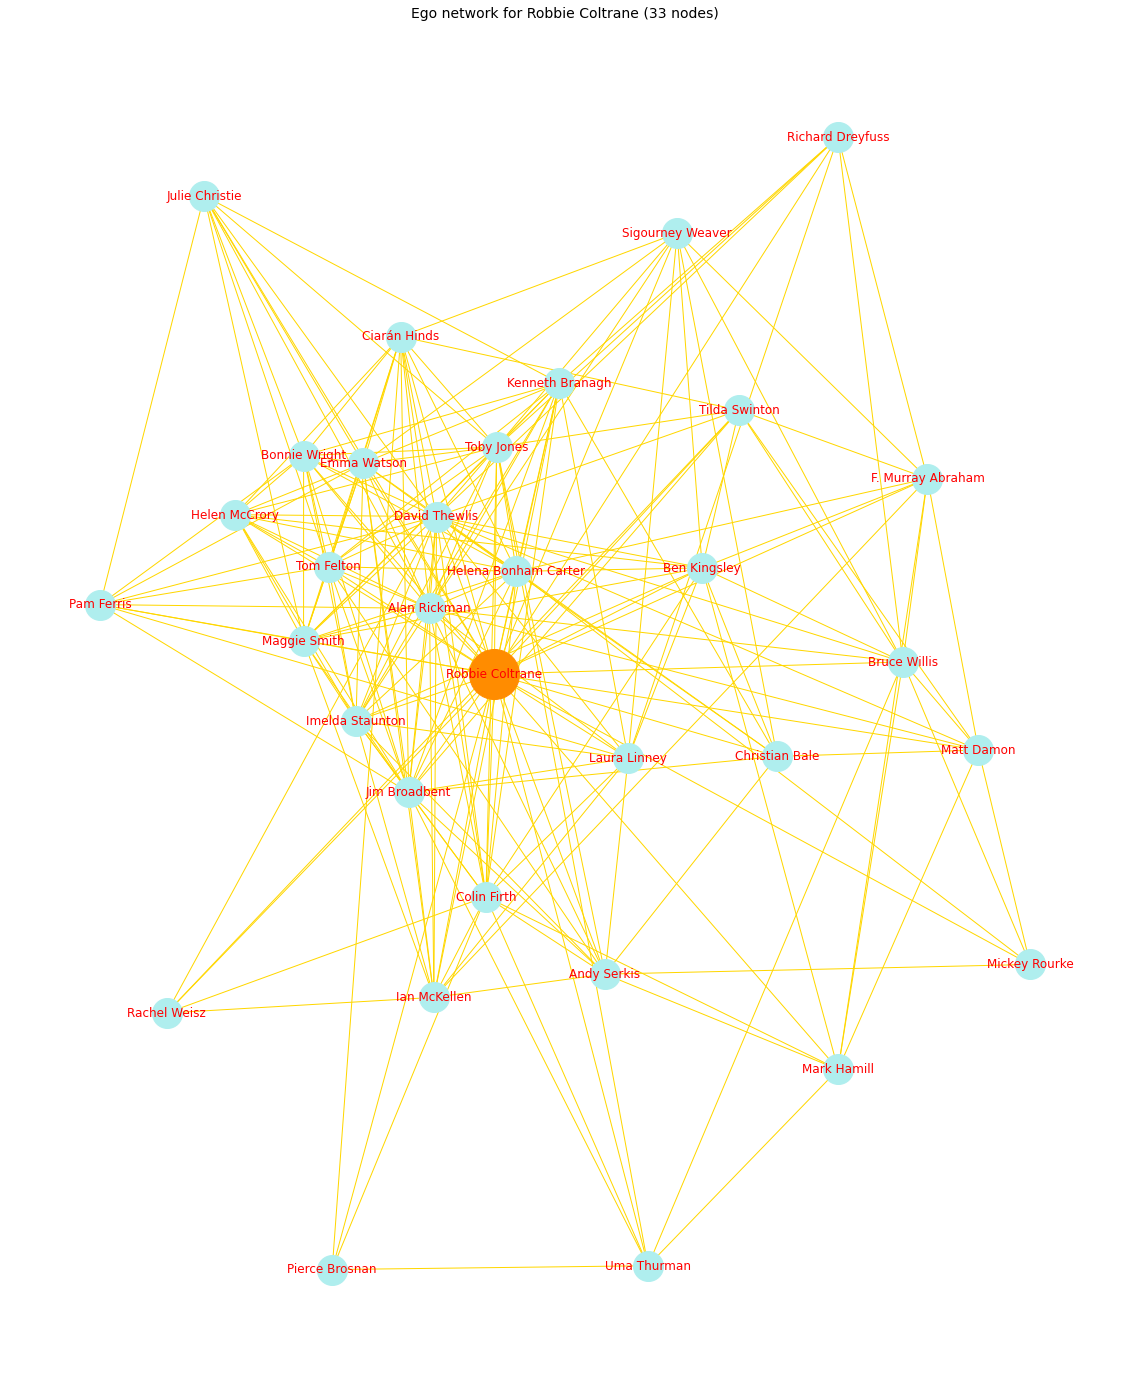

In [881]:
display_ego(eg1,g1_ego_node)

In [882]:
components(eg1)

The whole network is one component, made up of 1 connected component


In [883]:
networkDenisty(eg1,"eg1")

eg1 has a network density of 0.42


In [884]:
networkDiameter(eg1)

2

In [885]:
meanCluster(eg1,"eg1")

The nodes in eg1 have and average clustering coefficient of 0.62


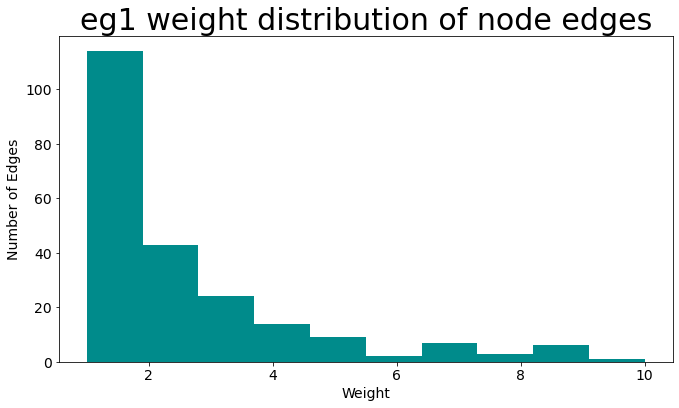

In [886]:
eg1_weights=createDF(eg1)
histogram(eg1_weights,"eg1 weight distribution of node edges")

In [887]:
eg1_10_weights=eg1_weights.sort_values(ascending=False).head(10)
eg1_10_weights

Robbie Coltrane  Emma Watson      10
Emma Watson      Bonnie Wright     9
Robbie Coltrane  Bonnie Wright     9
Bonnie Wright    Tom Felton        9
Robbie Coltrane  Alan Rickman      9
                 Tom Felton        9
Emma Watson      Tom Felton        9
Alan Rickman     Tom Felton        8
Bonnie Wright    Alan Rickman      8
Emma Watson      Alan Rickman      8
dtype: int64

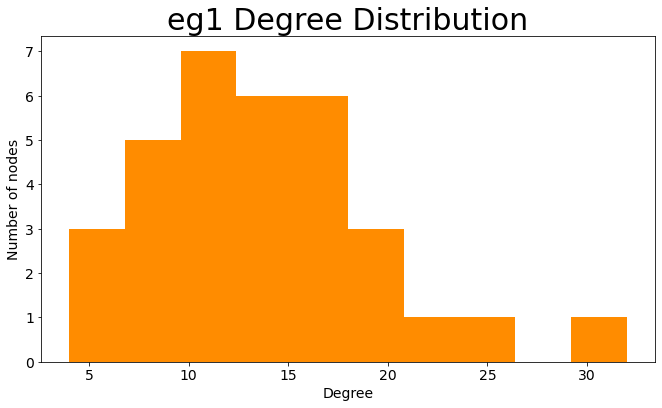

In [888]:
degrees_eg1=degrees_df(eg1)
deghistogram(degrees_eg1,"eg1 Degree Distribution")

In [889]:
eg1deg=degrees_eg1.sort_values(ascending=False).head(10)
eg1deg

Robbie Coltrane         32
David Thewlis           24
Alan Rickman            22
Jim Broadbent           20
Toby Jones              19
Helena Bonham Carter    18
Imelda Staunton         17
Maggie Smith            17
Emma Watson             17
Colin Firth             17
dtype: int64

In [890]:
type(eg1deg)

pandas.core.series.Series

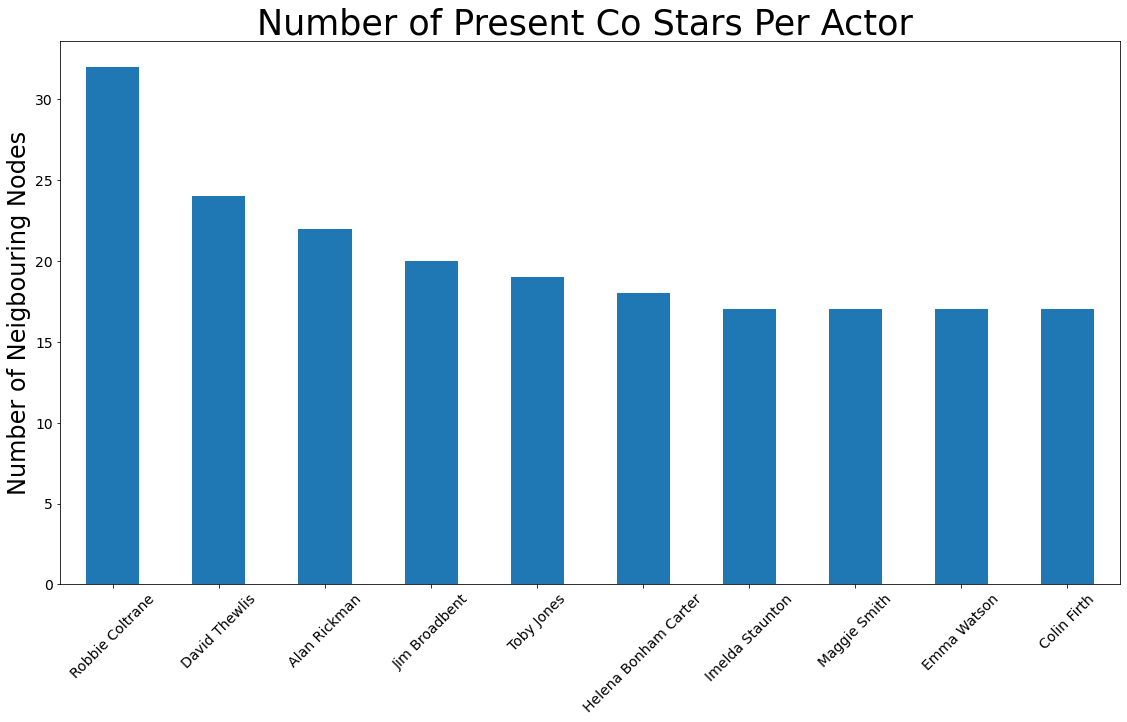

In [891]:
barChart(eg1deg,"Number of Present Co Stars Per Actor ")

## Ego Network 2


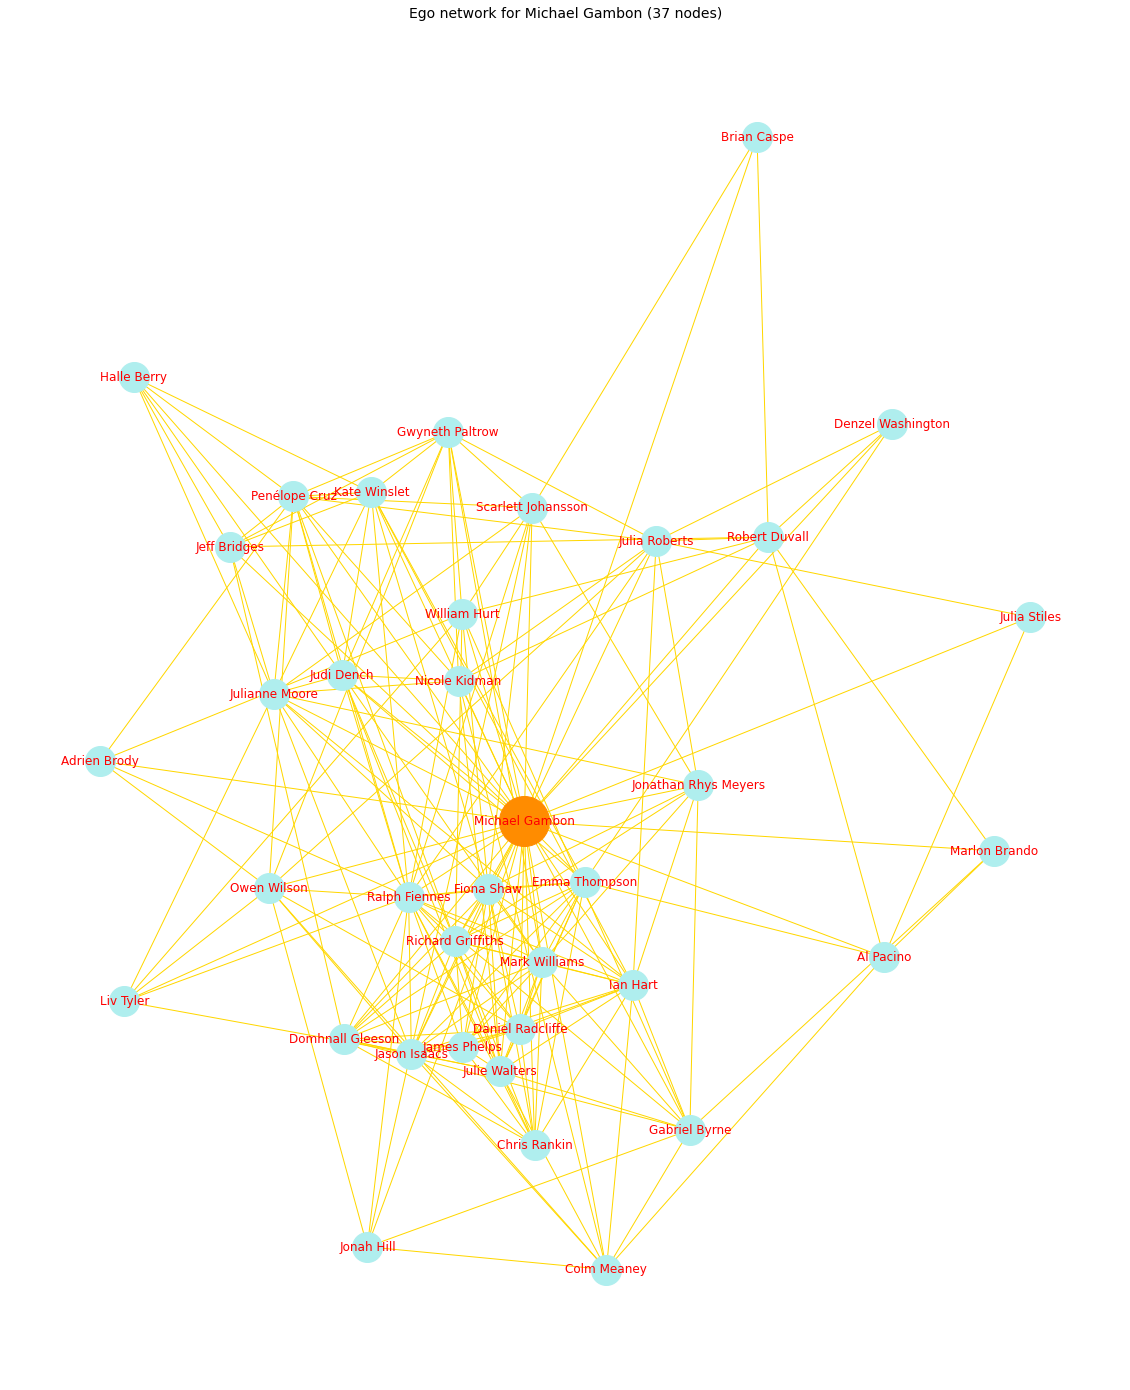

In [892]:
display_ego(eg2,g2_ego_node)

In [893]:
components(eg2)

The whole network is one component, made up of 1 connected component


In [894]:
networkDenisty(eg2,"eg2")

eg2 has a network density of 0.32


In [895]:
networkDiameter(eg2)

2

In [896]:
meanCluster(eg2,"eg2")

The nodes in eg2 have and average clustering coefficient of 0.6


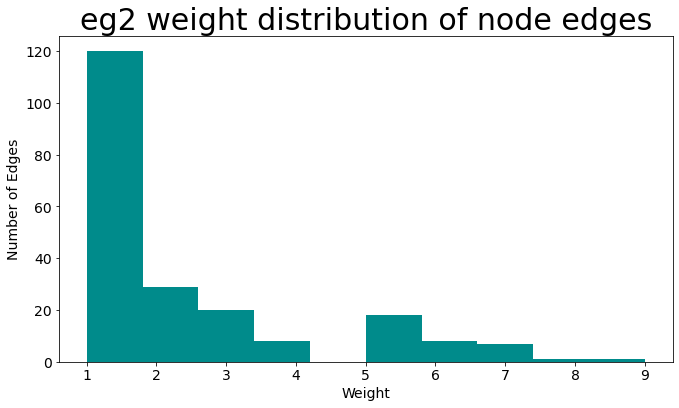

In [897]:
eg2_weights=createDF(eg2)
histogram(eg2_weights,"eg2 weight distribution of node edges")

In [898]:
eg2_10_weights=eg2_weights.sort_values(ascending=False).head(10)
eg2_10_weights

Daniel Radcliffe  James Phelps        9
Julie Walters     Michael Gambon      8
                  Daniel Radcliffe    7
Michael Gambon    Mark Williams       7
Daniel Radcliffe  Michael Gambon      7
                  Mark Williams       7
Michael Gambon    James Phelps        7
Julie Walters     James Phelps        7
Mark Williams     James Phelps        7
Michael Gambon    Emma Thompson       6
dtype: int64

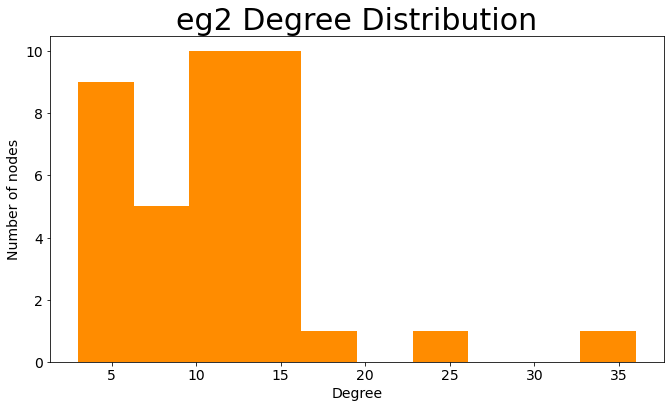

In [899]:
degrees_eg2=degrees_df(eg2)
deghistogram(degrees_eg2,"eg2 Degree Distribution")

In [900]:
eg2deg=degrees_eg2.sort_values(ascending=False).head(10)
eg2deg

Michael Gambon       36
Ralph Fiennes        24
Fiona Shaw           17
Richard Griffiths    16
Jason Isaacs         16
Ian Hart             16
Julie Walters        16
Mark Williams        16
Emma Thompson        15
Julianne Moore       14
dtype: int64

In [901]:
type(eg2deg)

pandas.core.series.Series

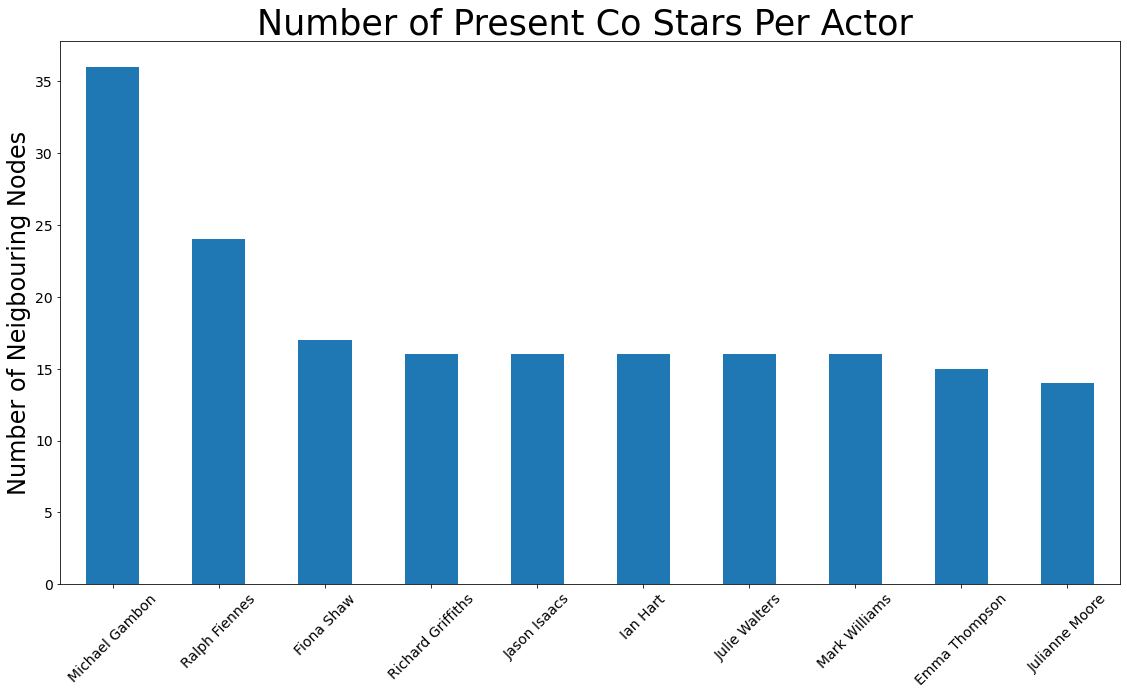

In [902]:
barChart(eg2deg,"Number of Present Co Stars Per Actor ")

# 4. Network visualisation

In [903]:
# Write GEXF XML format
nx.write_gexf(g1, "18391933g1.gexf", prettyprint=True)
nx.write_gexf(g2, "18391933g2.gexf", prettyprint=True)